


# Интернет-магазин

### Описание проекта
Совместно с отделом маркетинга крупного интернет-магазина мы подготовили список гипотез для увеличения выручки.  
Необходимо приоритезировать гипотезы, запустить A/B-тест и проанализировать результаты.

### Описание данных
Файл hypothesis.csv
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы.
  
Файл orders.csv
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ.
  
Файл visitors.csv
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста

### План работы
0. [Открытие файлов и предобработка](#step0)  
[Вывод](#step0_conclusion)  


1. [Приоритизация гипотез](#step1)
   - [C применением фреймворка ICE](#step1_ice)
   - [C применением фреймворка RICE](#step1_rice)
   [Вывод](#step1_conclusion)
    
    
2. [Анализ A/B-теста](#step2)  

   1. Графики:
      - [кумулятивной выручки по группам](#step2_1)
      - [кумулятивного среднего чека по группам](#step2_2)
      - [относительного изменения кумулятивного среднего чека группы B к группе A](#step2_3)
      - [кумулятивной конверсии по группам](#step2_4)
      - [относительного изменения кумулятивной конверсии группы B к группе A](#step2_5)  
      
   2. [Точечный график количества заказов по пользователям](#step2_6)  
   3. [95-й и 99-й перцентили количества заказов на пользователя](#step2_7)  
   4. [Точечный график стоимостей заказов](#step2_8) 
   5. [95-й и 99-й перцентили стоимости заказов](#step2_9)    
   6. Статистическая значимость различий в:
      - [конверсии между группами по «сырым» данным](#step2_10)
      - [среднем чеке заказа между группами по «сырым» данным](#step2_11)
      - [конверсии между группами по «очищенным» данным](#step2_12)
      - [среднем чеке заказа между группами по «очищенным» данным](#step2_13)  
      
   7. [Решение по результатам теста](#step2_14)  
   
   [Вывод](#step2_conclusion)
   
   
3. [Общий вывод](#step3)

<a name="step0"></a>
## Шаг 0. Открытие файлов и предобработка

In [34]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as st
import numpy as np
import datetime as dt
%matplotlib inline

In [3]:
# открытие файлов
hypothesis = pd.read_csv('hypothesis.csv')
orders = pd.read_csv('orders.csv')
visitors = pd.read_csv('visitors.csv')

In [4]:
# вывод общей информации о таблице hypothesis
display(hypothesis.info())
display(hypothesis.head())
hypothesis.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


None

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


,Reach,Impact,Confidence,Efforts
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000


Данные полные, выбросов нет.

In [6]:
# вывод общей информации о таблице orders
display(orders.info())
display(orders.head())
orders['revenue'].describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


None

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


count    1.197000e+03
mean     8.348006e+03
std      3.919113e+04
min      5.000000e+01
25%      1.220000e+03
50%      2.978000e+03
75%      8.290000e+03
max      1.294500e+06
Name: revenue, dtype: float64

Данные полные, в прибыли есть большой разброс (с которым мы будем разбираться во второй части).  
  
Что необходимо сделать:
- Названия стобцов имеют не "питонячий" вид - поэтому переименуюем столбцы так, чтобы CamelCase стал snake_case
- Столбец с датой имеет тип str

In [7]:
# замена названий столбцов в таблице orders с CamelCase на snake_case
def camel_to_snake(s):
    return ''.join(['_' + c.lower() if c.isupper() else c 
                    for c in s
                   ]).lstrip('_')

orders.columns = list(map(camel_to_snake, orders.columns))

In [11]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [12]:
# проверка, что все хорошо
orders.head()

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [13]:
# вывод общей информации о таблице visitors
display(visitors.info())
display(visitors.head())
visitors.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


None

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


,visitors
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


Опять только дата строкового типа

In [16]:
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

# проверка, что все хорошо
visitors.head()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<a name="step0_conclusion"></a>
### Вывод
1. Данные полные, пропусков нет
2. Столбцы с датой (`orders['date']` `visitors['date']`) были представлены типом str. 
3. Столбцы таблицы `orders` имели названия в CamelCase. Сейчас они исправлены на snake_case
---

<a name="step1"></a>
## Шаг 1. Приоритизация гипотез

<a name="step1_ice"></a>
#### Фреймворк ICE

In [19]:
hypothesis['ICE'] = hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']

# вывод полученных данных
hypothesis[['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False)

,Hypothesis,ICE
8,"Запустить акцию, дающую скидку на товар в день...",16.200000
0,"Добавить два новых канала привлечения трафика,...",13.333333
7,Добавить форму подписки на все основные страни...,11.200000
6,Показать на главной странице баннеры с актуаль...,8.000000
2,Добавить блоки рекомендаций товаров на сайт ин...,7.000000
1,"Запустить собственную службу доставки, что сок...",2.000000
5,"Добавить страницу отзывов клиентов о магазине,...",1.333333
3,"Изменить структура категорий, что увеличит кон...",1.125000
4,"Изменить цвет фона главной страницы, чтобы уве...",1.000000


<a name="step1_rice"></a>
#### Фреймворк RICE

In [20]:
hypothesis['RICE'] = hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts']

# вывод полученных данных
hypothesis[['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False)

,Hypothesis,RICE
7,Добавить форму подписки на все основные страни...,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,56.0
0,"Добавить два новых канала привлечения трафика,...",40.0
6,Показать на главной странице баннеры с актуаль...,40.0
8,"Запустить акцию, дающую скидку на товар в день...",16.2
3,"Изменить структура категорий, что увеличит кон...",9.0
1,"Запустить собственную службу доставки, что сок...",4.0
5,"Добавить страницу отзывов клиентов о магазине,...",4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3.0


<a name="step1_conclusion"></a>
### Вывод
Если сравнивать первую пятерку и последнюю четверку гипотез, то их содержание одинаково в двух фреймворках приоритизации.  

Но бросается в глаза 8 гипотеза, которая в ICE стоит на 1 месте, а в RICE на 5 месте. ПОхожая картина наблюдается и со 2 гипотезой.  

Почему произошли такие скачки? Основное отличие в двух фреймворках - это наличие параметра Reach (охват пользователей). Так нарпимер, было небольшое изменение по ICE, но если оно захватывает всех пользователей - то в RICE оно будет более значительным. Это очень похоже на правило 80/20 (небольшое изменение на много пользователей и большое изменение на 1 человека).   

Бизнесу важно ориентироваться на большинство сових клиентов, поэтому приоритизация по RICE будет более привлекательна для выстраивания последовательности реализаций. Изменения на основной странице должны быть в приоритете перед добавлением акции на конкретный товар.

---


<a name="step2"></a>
## Шаг 2. Анализ A/B-теста

Для начала объединим данные, что они были в таком формате   
для `orders`:
- дата
- группа
- кумулятивное уникальное число заказов
- кумулятивное уникальное число пользователей
- кумулятивное сумма выручки

для `visits`:
- дата
- группа
- кумулятивное уникальное число посетителей

In [28]:
datesGroups = orders[['date','group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({
    'date' : 'max',
    'group' : 'max',
    'transaction_id' : pd.Series.nunique,
    'visitor_id' : pd.Series.nunique,
    'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])].agg({
    'date' : 'max',
    'group' : 'max',
    'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

# вывод полученных датафреймов
display(ordersAggregated.head(3))
display(visitorsAggregated.head(3))

,date,group,transaction_id,visitor_id,revenue
55,2019-08-01,A,24,20,148579
66,2019-08-01,B,21,20,101217
175,2019-08-02,A,44,38,242401


,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338


Объединим данные, чтобы можно было посчитать конверсию.  
В итоговой таблице должно быть:
- дата
- группа
- кумулятивное уникальное число заказов
- кумулятивное уникальное число покупателей
- кумулятивное уникальное число посетителей
- кумулятивная сумма выручки
- кумулятивный средний чек

In [29]:
cumulativeData = ordersAggregated.merge(visitorsAggregated, on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

cumulativeData['conversion'] = cumulativeData['orders'] / cumulativeData['visitors']
cumulativeData['mean_check'] = cumulativeData['revenue'] / cumulativeData['orders']

# проверка
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors,conversion,mean_check
0,2019-08-01,A,24,20,148579,719,0.033380,6190.791667
1,2019-08-01,B,21,20,101217,713,0.029453,4819.857143
2,2019-08-02,A,44,38,242401,1338,0.032885,5509.113636
3,2019-08-02,B,45,43,266748,1294,0.034776,5927.733333
4,2019-08-03,A,68,62,354874,1845,0.036856,5218.735294


Для сравнения групп A и B необходимо также использовать итоговую таблицу, в которой содержится:
- дата
- конверсия группы А
- конверсия группы B
- средний чек группы А
- средний чек группы B

In [37]:
cumulativeDataA = cumulativeData[cumulativeData['group'] == 'A']
cumulativeDataB = cumulativeData[cumulativeData['group'] == 'B']

mergedCumulativeAB = cumulativeDataA[['date','conversion', 'mean_check']].merge(
    cumulativeDataB[['date','conversion', 'mean_check']], 
    on='date', 
    how='left', 
    suffixes=['_A', '_B']
)

# проверка
mergedCumulativeAB.head()

,date,conversion_A,mean_check_A,conversion_B,mean_check_B
0,2019-08-01,0.033380,6190.791667,0.029453,4819.857143
1,2019-08-02,0.032885,5509.113636,0.034776,5927.733333
2,2019-08-03,0.036856,5218.735294,0.033833,6245.836066
3,2019-08-04,0.032787,5067.845238,0.030315,6276.500000
4,2019-08-05,0.032851,5045.110092,0.030793,5762.326733


---
Теперь перейдем к построению графиков и интерпетации результатов

<a name="step2_1"></a>
#### График кумулятивной выручки по группам

Text(0.5, 0, 'Дата')

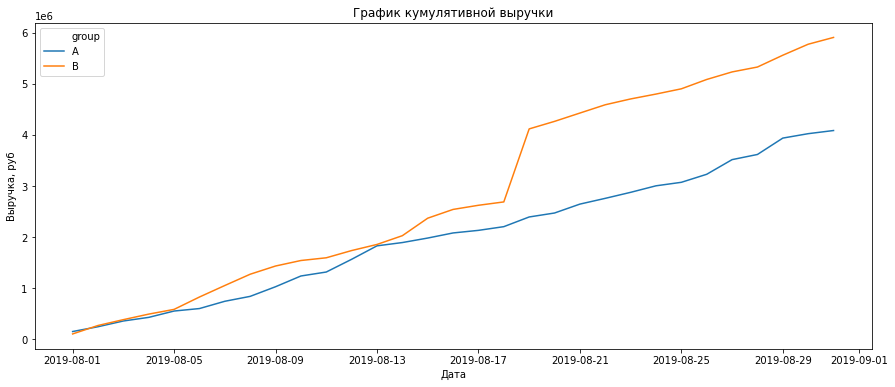

In [122]:
plt.figure(figsize=(15,6))

ax = sns.lineplot(y='revenue', x='date', data=cumulativeData, hue='group')
ax.set_title('График кумулятивной выручки')
ax.set_ylabel('Выручка, руб')
ax.set_xlabel('Дата')

На графике у группы В виден резкий скачок - это выбросы (кто-то купил на очень большую сумму), поэтому на сырых данных будет сложно сделать вывод

<a name="step2_2"></a>
#### График кумулятивного среднего чека по группам

Text(0.5, 0, 'Дата')

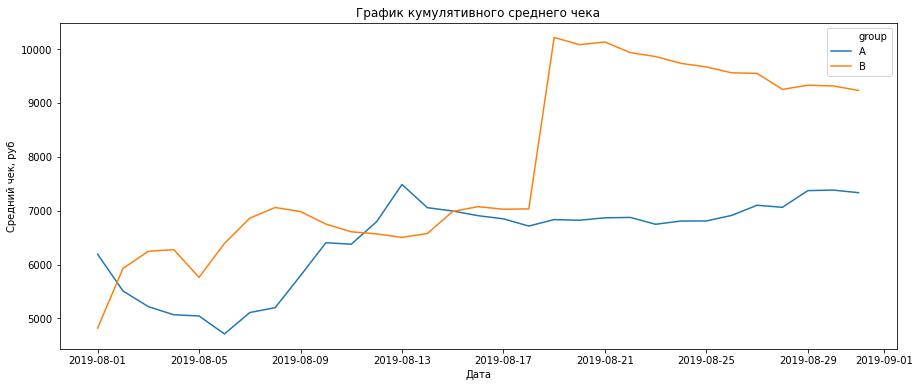

In [123]:
plt.figure(figsize=(15,6))

ax = sns.lineplot(y='mean_check', x='date', data=cumulativeData, hue='group')
ax.set_title('График кумулятивного среднего чека')
ax.set_ylabel('Средний чек, руб')
ax.set_xlabel('Дата')

Группа А к концу периода уже выровнялась, а в группе В из-за высокой стоимости покупки резко подлетел и средний чек. Эти данные по-любому надо будет чистить.

<a name="step2_3"></a>
#### График относительного изменения кумулятивного среднего чека группы B к группе A

Text(0.5, 0, 'Дата')

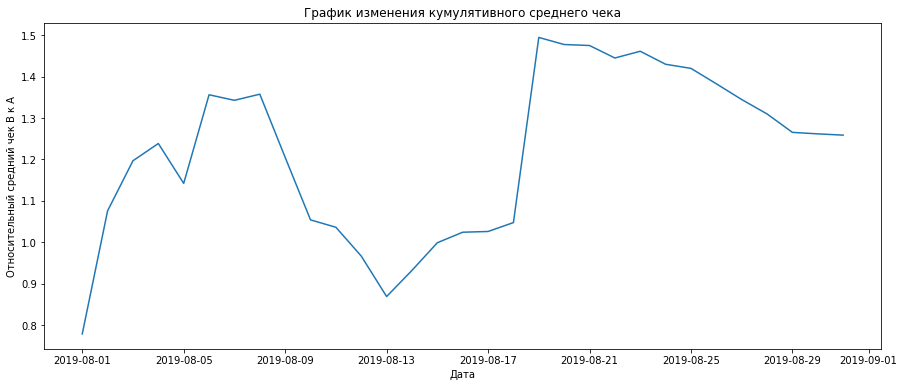

In [124]:
mergedCumulativeAB['mean_check_B_A'] = mergedCumulativeAB['mean_check_B'] / mergedCumulativeAB['mean_check_A']

plt.figure(figsize=(15,6))

ax = sns.lineplot(y='mean_check_B_A', x='date', data=mergedCumulativeAB)
ax.set_title('График изменения кумулятивного среднего чека')
ax.set_ylabel('Относительный средний чек В к А')
ax.set_xlabel('Дата')

<a name="step2_4"></a>
#### График кумулятивной конверсии по группам

Text(0.5, 0, 'Дата')

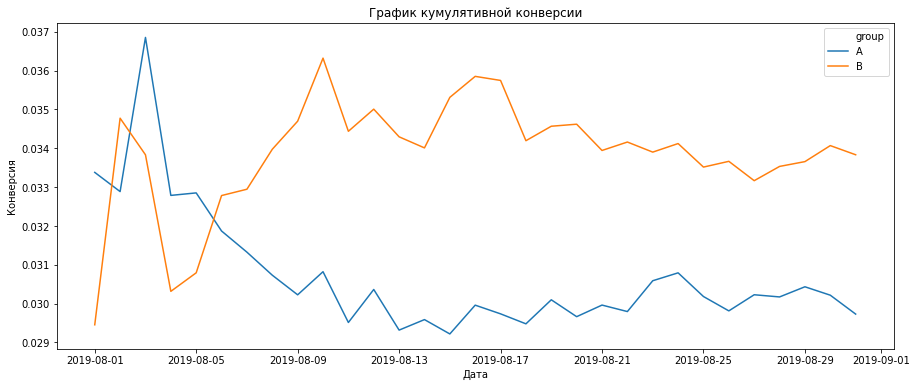

In [125]:
plt.figure(figsize=(15,6))

ax = sns.lineplot(y='conversion', x='date', data=cumulativeData, hue='group')
ax.set_title('График кумулятивной конверсии')
ax.set_ylabel('Конверсия')
ax.set_xlabel('Дата')

Конверсия по группам стабилизировалась и колеблется вокруг своих значений. При этом у группы В она выше, чем у группы А

<a name="step2_5"></a>
#### График относительного изменения кумулятивной конверсии группы B к группе A

Text(0.5, 0, 'Дата')

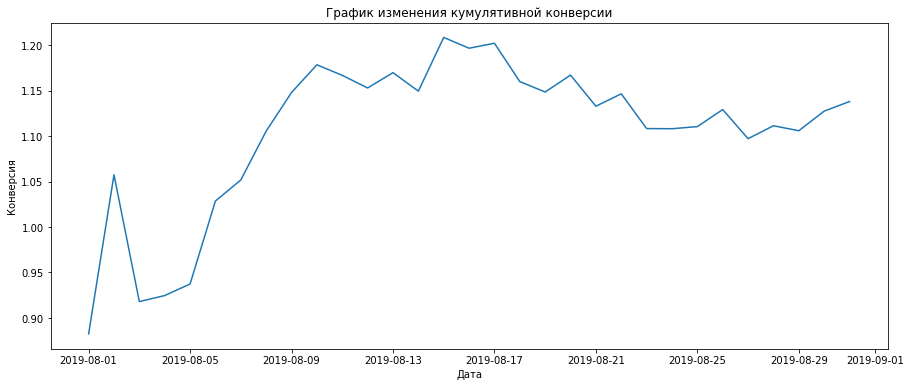

In [126]:
mergedCumulativeAB['conversion_B_A'] = (
    mergedCumulativeAB['conversion_B'] / mergedCumulativeAB['conversion_A']
)

plt.figure(figsize=(15,6))

ax = sns.lineplot(y='conversion_B_A', x='date', data=mergedCumulativeAB)
ax.set_title('График изменения кумулятивной конверсии')
ax.set_ylabel('Конверсия')
ax.set_xlabel('Дата')

<a name="step2_6"></a>
#### Точечный график количества заказов по пользователям

Text(0, 0.5, 'Количество заказов')

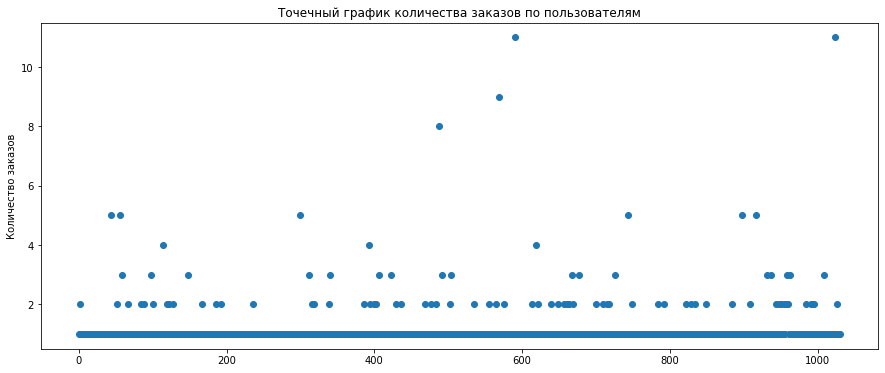

In [131]:
plt.figure(figsize=(15,6))

y_values_orders = orders.groupby('visitor_id')['revenue'].count()
x_values_orders = pd.Series(range(0,len(y_values_orders)))
plt.scatter(x_values_orders, y_values_orders)
plt.title('Точечный график количества заказов по пользователям')
plt.ylabel('Количество заказов')

На графике очень хорошо прослеживаются выбросы - 1-2 покупки - это нормальное положение дел.

<a name="step2_7"></a>
#### 95-й и 99-й перцентили количества заказов на пользователя

In [115]:
np.percentile(y_values_orders, [95, 99])

array([2., 4.])

И правда - 2 и менее покупки бывают у 95% пользвователей, а больше 4 покупок встречается только у 1%.
По покупка у нас в среднем получились голубцы (кто-то есть мясо, кто-то капусту)

<a name="step2_8"></a>
#### Точечный график стоимостей заказов

Text(0, 0.5, 'Стоимость заказов')

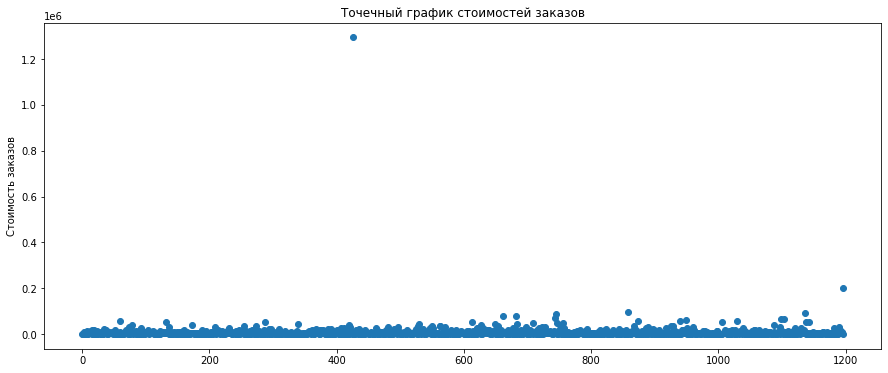

In [132]:
plt.figure(figsize=(15,6))

x_values_costs = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values_costs, orders['revenue'])
plt.title('Точечный график стоимостей заказов')
plt.ylabel('Стоимость заказов')

<a name="step2_9"></a>
#### 95-й и 99-й перцентили стоимости заказов

In [56]:
np.percentile(orders['revenue'], [95, 99])

array([28000. , 58233.2])

Суммы для 95 и 99 перцентиля отличаются чуть более, чем в два раза. Чаще всего (а именно в 95% случаев), покупатели совершают покупки до 30 тыс руб, а значит очищать мы будем от оставшихся 5%.



---
Для сравнения выборок и принятия решений сформируем таблицу, в которой будут поля  
(заказы, посетители, выручка * кумулятивные * по группам):
- дата
- количество посетителей группы А
- кумулятивное количество посетителей группы А до даты
- количество заказов группы А
- кумулятивное количество заказов группы А до даты
- сумма заказов группы А
- кумулятивное сумма заказов группы А до даты
- количество посетителей группы В
- кумулятивное количество посетителей группы В до даты
- количество заказов группы В
- кумулятивное количество заказов группы В до даты
- сумма заказов группы В
- кумулятивное сумма заказов группы В до даты

In [93]:
# данные по дню
data_per_day = (
    orders
    .groupby(['date', 'group'])
    .agg({'transaction_id': 'nunique', 'revenue': 'sum'})
    .reset_index()
    .merge(visitors, on=['date', 'group'])
)
data_per_day.columns = ['date', 'group', 'orders', 'revenue', 'visitors']

# кумулятивные данные
dataAB = data_per_day.merge(
    cumulativeData[['date', 'group', 'orders', 'revenue', 'visitors', 'conversion']], 
    on=['date', 'group'], 
    suffixes=('', '_cum'))

# разделение по группам
dataA = dataAB[dataAB['group'] == 'A']
dataB = dataAB[dataAB['group'] == 'B']

data = dataA.merge(dataB, on='date', suffixes=('_A', '_B'))
del data['group_A']
del data['group_B']
data.head()

,date,orders_A,revenue_A,visitors_A,orders_cum_A,revenue_cum_A,visitors_cum_A,conversion_A,orders_B,revenue_B,visitors_B,orders_cum_B,revenue_cum_B,visitors_cum_B,conversion_B
0,2019-08-01,24,148579,719,24,148579,719,0.033380,21,101217,713,21,101217,713,0.029453
1,2019-08-02,20,93822,619,44,242401,1338,0.032885,24,165531,581,45,266748,1294,0.034776
2,2019-08-03,24,112473,507,68,354874,1845,0.036856,16,114248,509,61,380996,1803,0.033833
3,2019-08-04,16,70825,717,84,425699,2562,0.032787,17,108571,770,78,489567,2573,0.030315
4,2019-08-05,25,124218,756,109,549917,3318,0.032851,23,92428,707,101,581995,3280,0.030793


<a name="step2_10"></a>
#### Статистическая значимость различий в конверсии между группами по «сырым» данным



In [98]:
# Зададим уровень значимости равным 5% (точность в 1% нам ни к чему, выбор не общечеловеческой важности)
alpha = .05

In [121]:
ordersByUsersA = (orders[orders['group']=='A']
                  .groupby('visitor_id', as_index=False)
                  .agg({'transaction_id' : pd.Series.nunique})
                 )
ordersByUsersA.columns = ['user_id', 'orders']

ordersByUsersB = (orders[orders['group']=='B']
                  .groupby('visitor_id', as_index=False)
                  .agg({'transaction_id' : pd.Series.nunique})
                 )
ordersByUsersB.columns = ['user_id', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],
                     pd.Series(0, index=np.arange(data['visitors_A'].sum() - len(ordersByUsersA['orders'])), 
                               name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],
                     pd.Series(0, index=np.arange(data['visitors_B'].sum() - len(ordersByUsersB['orders'])), 
                               name='orders')],axis=0)

p_value = st.mannwhitneyu(sampleA, sampleB)[1]
print("p-value {0:.3f}".format(p_value))

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: конверсии сырых групп А и В отличаются')
else:
    print('Не можем отвергнуть нулевую гипотезу: конверсии сырых групп А и В не отличаются')

print()
print("Относительная конверсия группы В к А = {0:.1%}".format(sampleB.mean() / sampleA.mean() - 1))

p-value 0.008
Отвергаем нулевую гипотезу: конверсии сырых групп А и В отличаются

Относительная конверсия группы В к А = 13.8%


<a name="step2_11"></a>
#### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

In [103]:
p_value = st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]
print("p-value {0:.3f}".format(p_value))

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: средний чек сырых групп А и В отличаются')
else:
    print('Не можем отвергнуть нулевую гипотезу: средний чек сырых групп А и В не отличаются')

print()
print("Относительный средний чек группы В к А = {0:.1%}".format(orders[orders['group']=='B']['revenue'].mean()
                       / orders[orders['group']=='A']['revenue'].mean()-1))

p-value 0.365
Не можем отвергнуть нулевую гипотезу: средний чек сырых групп А и В не отличаются

Относительный средний чек группы В к А = 25.9%


---

Теперь посмотрим, как различаются показатели по очищенным данным (то есть без учета выбросов).  
Выделим аномальных пользователей

In [116]:
usersWithManyOrders = pd.concat([
    ordersByUsersA[ordersByUsersA['orders'] > 2]['user_id'], 
    ordersByUsersB[ordersByUsersB['orders'] > 2]['user_id']], 
    axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 28000]['visitor_id']

abnormalUsers = pd.concat([
    usersWithManyOrders, 
    usersWithExpensiveOrders], 
    axis = 0).drop_duplicates().sort_values()

# выведем количество аномальных пользователей
len(abnormalUsers)

74

74 пользователя - совсем ничего, по сравнению с 1000. Избавляемся от "выскочек"

<a name="step2_12"></a>
#### Статистическая значимость различий в конверсии между группами по «очищенным» данным

In [119]:
# выберем пользователей без аномалий
sampleAFiltered = pd.concat([
    ordersByUsersA[np.logical_not(ordersByUsersA['user_id'].isin(abnormalUsers))]['orders'],
    pd.Series(0, index=np.arange(data['visitors_A'].sum() - len(ordersByUsersA['orders'])),name='orders')],
    axis=0)

sampleBFiltered = pd.concat([
    ordersByUsersB[np.logical_not(ordersByUsersB['user_id'].isin(abnormalUsers))]['orders'],
    pd.Series(0, index=np.arange(data['visitors_B'].sum() - len(ordersByUsersB['orders'])),name='orders')],
    axis=0)

p_value = st.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]
print("p-value {0:.3f}".format(p_value))

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: конверсии очищенных групп А и В отличаются')
else:
    print('Не можем отвергнуть нулевую гипотезу: конверсии очищенных групп А и В не отличаются')

print()
print("Относительная конверсия группы В к А = {0:.1%}".format(sampleBFiltered.mean() / sampleAFiltered.mean() - 1))

p-value 0.007
Отвергаем нулевую гипотезу: конверсии очищенных групп А и В отличаются

Относительная конверсия группы В к А = 17.3%


Результат теста для "сырых" и "очищенных" данных не изменился - конверсии отличаются. Но в очищенных данных эта разница стала еще больше (для сырых - 13,8%, для очищенных - 17,3%)

<a name="step2_13"></a>
#### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

In [120]:
filtered_rev_A = orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue']

filtered_rev_B = orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitor_id'].isin(abnormalUsers)))]['revenue']

p_value = st.mannwhitneyu(filtered_rev_A, filtered_rev_B)[1]
print("p-value {0:.3f}".format(p_value))

if p_value < alpha:
    print('Отвергаем нулевую гипотезу: средний чек очищенных групп А и В отличаются')
else:
    print('Не можем отвергнуть нулевую гипотезу: средний чек очищенных групп А и В не отличаются')

print()
print("Относительный средний чек группы В к А = {0:.1%}".format(filtered_rev_B.mean() / filtered_rev_A.mean()-1))

p-value 0.369
Не можем отвергнуть нулевую гипотезу: средний чек очищенных групп А и В не отличаются

Относительный средний чек группы В к А = -2.0%


Опять же результат теста не изменился - средние чеки групп не отличаются. Но для группы В после очистки данных показатель среднего чека стал ниже и даже меньше среднего чека группы А (для сырых - 25,9%, для очищенных - -2%)



<a name="step2_14"></a>
#### Решение по результатам теста

Что мы имеем:
1. Конверсии групп А и В отличаются. Относительная конверсия группы В к А = 17.3% 
2. Средний чек группы В и А не отличаются.

Варианты решений: 
1. Остановить тест, зафиксировать победу одной из групп. 
2. Остановить тест, зафиксировать отсутствие различий между группами. 
3. Продолжить тест.

Основываясь на том, что по одному из критериев уже устоявшаяся тенденция и есть значимые различия (это мы про конверсии), то стоит останосить тест и признать, что группа В имеет бОльшую конверсия, по сравнению с группой А. Средние чеки у этих групп не различаются, но зато на сайте происходит больше покупок, что не может не радовать.

<a name="step2_conclusion"></a>
### Вывод
1. **Кумулятивная выручка**. На графике у группы В виден резкий скачок - это выбросы (кто-то купил на очень большую сумму), поэтому на сырых данных будет сложно сделать вывод
2. **Кумулятивный редний чек**. Группа А к концу периода уже выровнялась, а в группе В из-за высокой стоимости покупки резко подлетел и средний чек
3. **Относительное изменение среднего чека В к А**. Кумулятичный средний чек группы В очень скачет - то резко вниз, то резко вверх. К концу периода нет намека на то, что средний чек выровнялся
4. **Кумулятивная конверсия**. Конверсия по группам стабилизировалась и колеблется вокруг своих значений. При этом у группы В она выше, чем у группы А
5. **Относительное изменение конверсии В к А**. В относительных величинах также видна "стабилизация" - относительная конверсия группы В к группе А находится в промежутке между 1.10 и 1.15
6. **Распределение количества заказов пользователей**. На графике очень хорошо прослеживаются выбросы - 1-2 покупки - это нормальное положение дел
7. **95 и 99 процентали числа покупок**. И правда - 2 и менее покупки бывают у 95% пользвователей, а больше 4 покупок встречается только у 1%. По покупка у нас в среднем получились голубцы (кто-то есть мясо, кто-то капусту)
8. **Распределение суммы покупок**. Встречаются и милионные покупки - но только 1 раз (и то, возможно кто-то ошибся).
9. **95 и 99 процентали суммы покупок**. Суммы для 95 и 99 перцентиля отличаются чуть более, чем в два раза. Чаще всего (а именно в 95% случаев), покупатели совершают покупки до 30 тыс руб, а значит очищать мы будем от оставшихся 5%.
10. **Аномальные пользователи**. Найдено 74 аномальных пользователя (либо покупок более 2, либо сумма покупки выше 28 тыс, либо и то, и другое)
10. **Статистическая значимость конверсий**. Результат теста для "сырых" и "очищенных" данных не изменился - конверсии отличаются. Но в очищенных данных эта разница стала еще больше (для сырых - 13,8%, для очищенных - 17,3%)
11. **Относительная конверсия группы В к А**. Конверсии групп А и В отличаются. Относительная конверсия группы В к А = 17.3% 
13. **Статистическая значимость среднего чека**. Средний чек группы В и А не отличаются.
12. **Относительный средний чек группы В к А**. Опять же результат теста не изменился - средние чеки групп не отличаются. Но для группы В после очистки данных показатель среднего чека стал ниже и даже меньше среднего чека группы А (для сырых - 25,9%, для очищенных - -2%)  

**Решение по результатам А/В теста**: Основываясь на том, что по одному из критериев уже устоявшаяся тенденция и есть значимые различия (это мы про конверсии), то стоит останосить тест и признать, что группа В имеет бОльшую конверсия, по сравнению с группой А. Средние чеки у этих групп не различаются, но зато на сайте происходит больше покупок, что не может не радовать.

---

<a name="step3"></a>
## Шаг 3. Общий вывод

Шаг 0. [Открытие файлов и предобработка](#step0) 
   1. Данные полные, пропусков нет
   2. Столбцы с датой (`orders['date']` `visitors['date']`) были представлены типом str. 
   3. Столбцы таблицы `orders` имели названия в CamelCase. Сейчас они исправлены на snake_case
   
Шаг 1. [Приоритизация гипотез](#step1)  
   - Если сравнивать первую пятерку и последнюю четверку гипотез, то их содержание одинаково в двух фреймворках приоритизации.  

   - Но бросается в глаза 8 гипотеза, которая в ICE стоит на 1 месте, а в RICE на 5 месте. ПОхожая картина наблюдается и со 2 гипотезой.  

   - Почему произошли такие скачки? Основное отличие в двух фреймворках - это наличие параметра Reach (охват пользователей). Так нарпимер, было небольшое изменение по ICE, но если оно захватывает всех пользователей - то в RICE оно будет более значительным. Это очень похоже на правило 80/20 (небольшое изменение на много пользователей и большое изменение на 1 человека).   

   - Бизнесу важно ориентироваться на большинство сових клиентов, поэтому приоритизация по RICE будет более привлекательна для выстраивания последовательности реализаций. Изменения на основной странице должны быть в приоритете перед добавлением акции на конкретный товар.

Шаг 2. [Анализ A/B теста](#step2) 
1. **Кумулятивная выручка**. На графике у группы В виден резкий скачок - это выбросы (кто-то купил на очень большую сумму), поэтому на сырых данных будет сложно сделать вывод
2. **Кумулятивный редний чек**. Группа А к концу периода уже выровнялась, а в группе В из-за высокой стоимости покупки резко подлетел и средний чек
3. **Относительное изменение среднего чека В к А**. Кумулятичный средний чек группы В очень скачет - то резко вниз, то резко вверх. К концу периода нет намека на то, что средний чек выровнялся
4. **Кумулятивная конверсия**. Конверсия по группам стабилизировалась и колеблется вокруг своих значений. При этом у группы В она выше, чем у группы А
5. **Относительное изменение конверсии В к А**. В относительных величинах также видна "стабилизация" - относительная конверсия группы В к группе А находится в промежутке между 1.10 и 1.15
6. **Распределение количества заказов пользователей**. На графике очень хорошо прослеживаются выбросы - 1-2 покупки - это нормальное положение дел
7. **95 и 99 процентали числа покупок**. И правда - 2 и менее покупки бывают у 95% пользвователей, а больше 4 покупок встречается только у 1%. По покупка у нас в среднем получились голубцы (кто-то есть мясо, кто-то капусту)
8. **Распределение суммы покупок**. Встречаются и милионные покупки - но только 1 раз (и то, возможно кто-то ошибся).
9. **95 и 99 процентали суммы покупок**. Суммы для 95 и 99 перцентиля отличаются чуть более, чем в два раза. Чаще всего (а именно в 95% случаев), покупатели совершают покупки до 30 тыс руб, а значит очищать мы будем от оставшихся 5%.
10. **Аномальные пользователи**. Найдено 74 аномальных пользователя (либо покупок более 2, либо сумма покупки выше 28 тыс, либо и то, и другое)
10. **Статистическая значимость конверсий**. Результат теста для "сырых" и "очищенных" данных не изменился - конверсии отличаются. Но в очищенных данных эта разница стала еще больше (для сырых - 13,8%, для очищенных - 17,3%)
11. **Относительная конверсия группы В к А**. Конверсии групп А и В отличаются. Относительная конверсия группы В к А = 17.3% 
13. **Статистическая значимость среднего чека**. Средний чек группы В и А не отличаются.
12. **Относительный средний чек группы В к А**. Опять же результат теста не изменился - средние чеки групп не отличаются. Но для группы В после очистки данных показатель среднего чека стал ниже и даже меньше среднего чека группы А (для сырых - 25,9%, для очищенных - -2%)  

### Решение по результатам А/В теста:  
Основываясь на том, что по одному из критериев уже устоявшаяся тенденция и есть значимые различия (это мы про конверсии), то стоит останосить тест и признать, что группа В имеет бОльшую конверсия, по сравнению с группой А. Средние чеки у этих групп не различаются, но зато на сайте происходит больше покупок, что не может не радовать.

Группа В - победила!